In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [2]:
%matplotlib inline

In [3]:
from sklearn.datasets import load_boston
boston = load_boston()

In [4]:
y = boston.target
X = pd.DataFrame(boston.data, columns=boston.feature_names)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 1)

In [5]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### OLS function

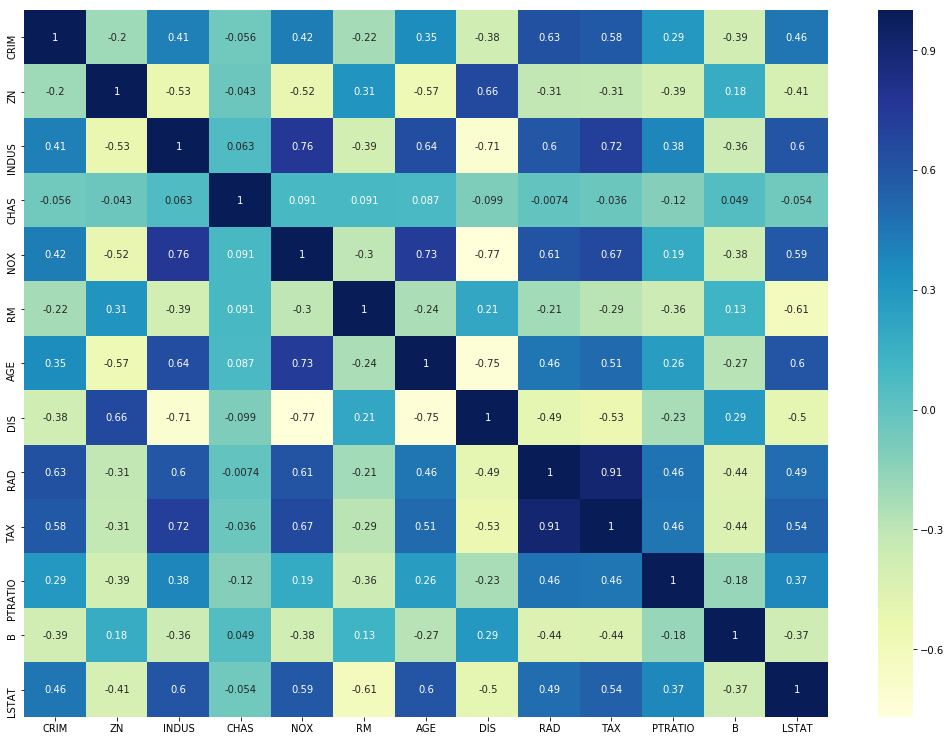

In [6]:
def overall_corr_matrix(X):
    plt.figure(figsize = (18,13))
    sns.heatmap(X.corr(), cmap="YlGnBu",annot = True);
overall_corr_matrix(X)

In [7]:
def Simple_Mulitple_regression(X,y):
    
    """Output for Simple Multiple Regression"""
    
    import statsmodels.api as sm
    import scipy.stats as stats
    plt.style.use('seaborn')
    
    X = sm.add_constant(X)
    model = sm.OLS(y,X)
    results = model.fit()
    print(results.summary())
    res = y - model.predict(results.params, X)
    mse = np.sqrt((res**2).sum()/len(res))
    print("_"*50)
    print(f"Mean Square Error is: {round(mse,2)}")
    
    
    #Coefficients
    plt.figure(figsize = (16,6))
    plt.bar(model.exog_names, results.params)
    plt.plot(model.exog_names, np.zeros(len(model.exog_names)) ,color = 'r',alpha = 0.8,linestyle = '--')
    plt.title("Coefficients")
    
    #Residuals
    plt.figure(figsize = (16,6))
    plt.scatter(range(len(y)),res)
    plt.plot(range(len(y)),np.zeros(len(y)),color = 'r',alpha = 0.8,linestyle = '--')
    plt.title('Residual Plot')
    
    fig,axes = plt.subplots(nrows=1, ncols=2,figsize =( 16,8))
    axes[0].hist(res)
    axes[0].set_title('Residuals Histogram')

    #QQ plot for Residuals
    probplot = sm.ProbPlot(res, stats.t, fit=True)
    fig = probplot.qqplot(line='45', ax = axes[1])
    h = plt.title('Q-Q plot for Residuals')
    plt.show()
    

    return model, results 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Fri, 01 May 2020   Prob (F-statistic):          6.72e-135
Time:                        23:56:22   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

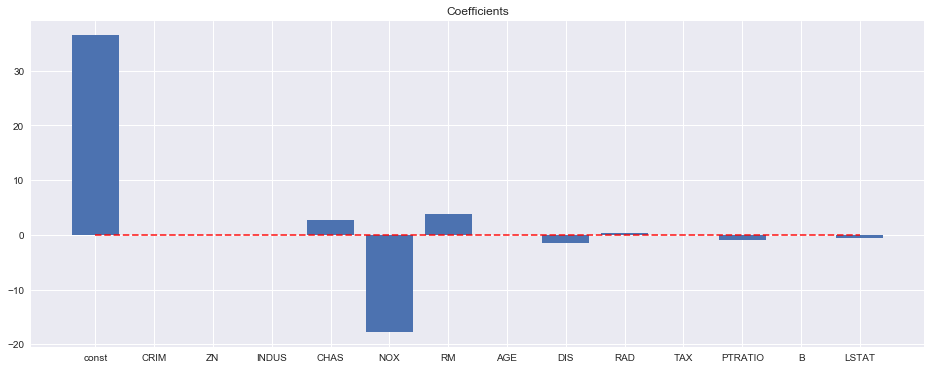

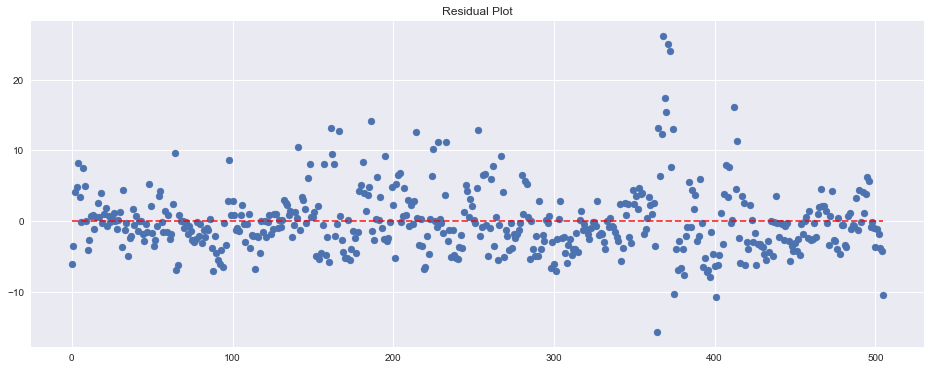

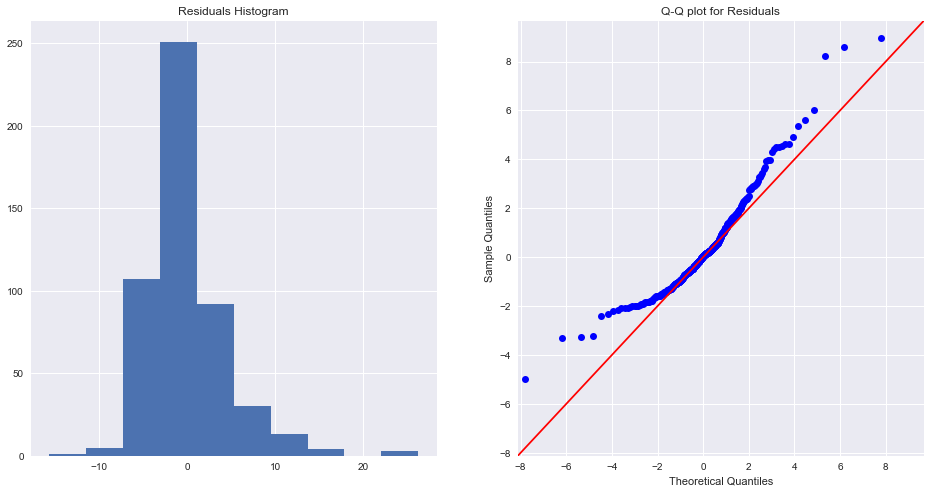

In [8]:
model, results = Simple_Mulitple_regression(X, y)

### SVR 

In [36]:
def fit_SVR(X_train,y_train,params, X_test= None,y_test= None):
    
    """Fits a Support Vector regressor with scaling"""
    
    from sklearn.svm import SVR
    from sklearn.preprocessing import StandardScaler
    from sklearn.preprocessing import MinMaxScaler
    plt.style.use('seaborn')
    
    if type(y_train) != np.ndarray:
        y_train = y_train.values
        if all(y_test):
            y_test = y_test.values
    
    #Scalars defined
    sc_X = StandardScaler()
    sc_y = StandardScaler()
    
#     sc_X = MinMaxScaler()
#     sc_y = MinMaxScaler()
    
    #Scalers fitted to training data
    X_train_scaled = sc_X.fit_transform(X_train)
    y_train_scaled = sc_y.fit_transform(y_train.reshape(-1,1))
#     y_train_scaled = y_train_scaled.ravel()
    
    if any(X_test):
        X_test_scaled = sc_X.transform(X_test)
        y_test_scaled = sc_y.fit(y_test.reshape(-1,1))
#         y_test_scaled = y_test_scaled.ravel()
        
    #Scaled data fitted to regressor
    regressor = SVR(**params)
    regressor.fit(X_train_scaled, y_train_scaled)
    
    #Training data
    y_train_pred_scaled = regressor.predict(X_train_scaled)
    y_train_pred = sc_y.inverse_transform(y_train_pred_scaled.reshape(-1,1))
    mse_train = np.sqrt(((y_train - y_train_pred.ravel())**2).sum()/len(y_train))
    print(f"Mean Square Error Train: {round(mse_train,2)}")
    
    fig,axes = plt.subplots(nrows=1, ncols=2,figsize =( 16,8))
    axes[0].scatter(y_train, y_train_pred)
    axes[0].set_title('Train: Actual vs Predicted')
    axes[0].set_xlabel('Actual')
    axes[0].set_ylabel('Predicted')
    axes[0].plot([y_train.min(),y_train.max()],[y_train.min(),y_train.max()], linestyle = "--", color = 'r' )
    
    
    
    if any(X_test):
        y_test_pred_scaled = regressor.predict(X_test_scaled)
        y_test_pred = sc_y.inverse_transform(y_test_pred_scaled.reshape(-1,1))
        mse_test = np.sqrt(((y_test - y_test_pred.ravel())**2).sum()/len(y_test))
        print(f"Mean Square Error Test:  {round(mse_test,2)}")
        
        axes[1].scatter(y_test, y_test_pred)
        axes[1].set_title('Train: Actual vs Predicted')
        axes[1].set_xlabel('Actual')
        axes[1].set_ylabel('Predicted')
        axes[1].plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()], linestyle = "--", color = 'r' )
        
        #Residuals
        res = y_test - y_test_pred.ravel()
        plt.figure(figsize = (16,6))
        plt.scatter(range(len(y_test)),res)
        plt.plot(range(len(y_test)),np.zeros(len(y_test)),color = 'r',alpha = 0.8,linestyle = '--')
        plt.title('Residual Plot for Test Data')
        
        
    return regressor, y_train_pred, y_test_pred


    

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Square Error Train: 1.37
Mean Square Error Test:  3.57


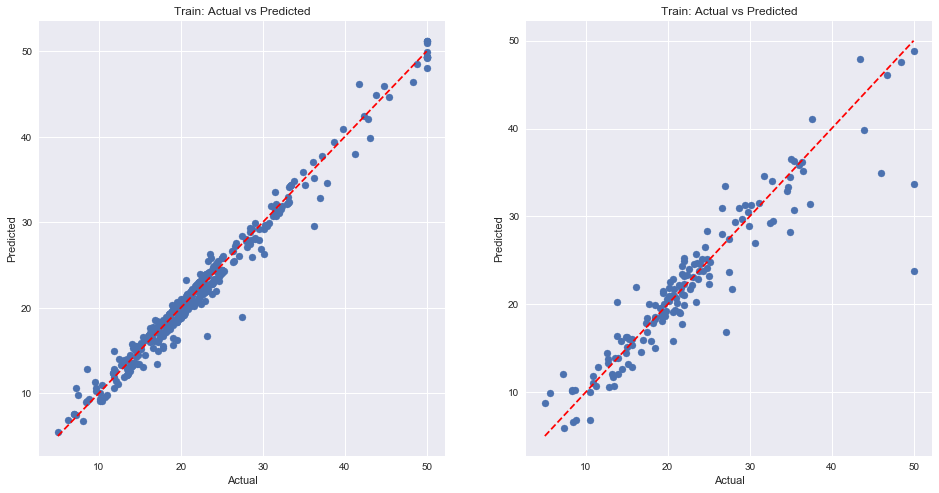

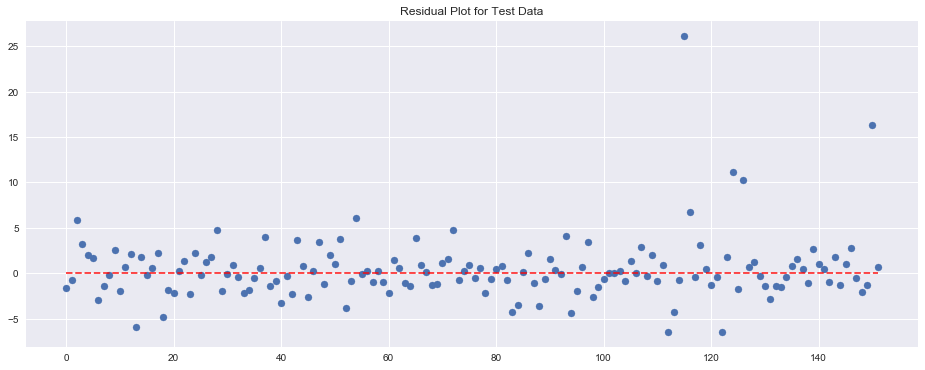

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 2)

params = {'C':20, 'kernel':'rbf'}
model, y_train_pred,y_test_pred =  fit_SVR(X_train,y_train,params, X_test, y_test)

### Decision Tree

In [38]:
def fit_DTRegressor(X_train,y_train,params, X_test= None,y_test= None):
    
    """Fits a Decision Tree regressor with scaling"""
    
    from sklearn.tree import DecisionTreeRegressor
    
    if type(y_train) != np.ndarray:
        y_train = y_train.values
        if all(y_test):
            y_test = y_test.values
    
    regressor = DecisionTreeRegressor(**params)
    regressor.fit(X_train, y_train)
    y_train_pred = regressor.predict(X_train)
    
    y_test_pred = regressor.predict(X_test)
    
    mse_train = np.sqrt(((y_train_pred -y_train)**2).sum()/len(y_train))
    print(f"Mean Square Error Train:  {round(mse_train,2)}")
    
    mse_test = np.sqrt(((y_test_pred -y_test)**2).sum()/len(y_test))
    print(f"Mean Square Error Test:  {round(mse_test,2)}")
    
    fig,axes = plt.subplots(nrows=1, ncols=2,figsize =( 16,8))
    axes[0].scatter(y_train, y_train_pred)
    axes[0].set_title('Train: Actual vs Predicted')
    axes[0].set_xlabel('Actual')
    axes[0].set_ylabel('Predicted')
    axes[0].plot([y_train.min(),y_train.max()],[y_train.min(),y_train.max()], linestyle = "--", color = 'r' )
    
    
    if any(X_test):
             
        axes[1].scatter(y_test, y_test_pred)
        axes[1].set_title('Test: Actual vs Predicted')
        axes[1].set_xlabel('Actual')
        axes[1].set_ylabel('Predicted')
        
        axes[1].plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()], linestyle = "--", color = 'r' )
        
        #Residuals
        res = y_test - y_test_pred
        plt.figure(figsize = (16,6))
        plt.scatter(range(len(y_test)),res)
        plt.plot(range(len(y_test)),np.zeros(len(y_test)),color = 'r',alpha = 0.8,linestyle = '--')
        plt.title('Residual Plot for Test Data')
    
    return regressor
    

In [39]:
params = {'min_samples_leaf':8, 'max_depth': 200}
regressor = fit_DTRegressor(X_train,y_train,params, X_test, y_test)

Mean Square Error Train:  3.45
Mean Square Error Test:  3.91


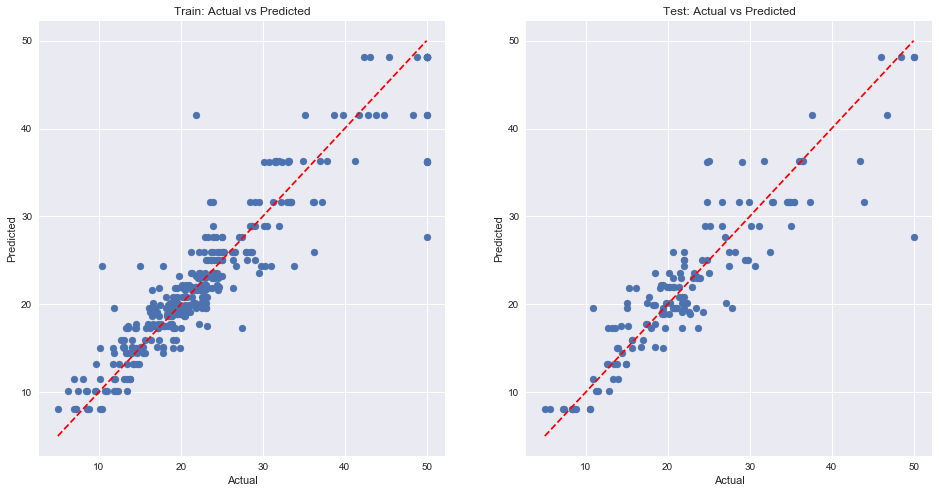

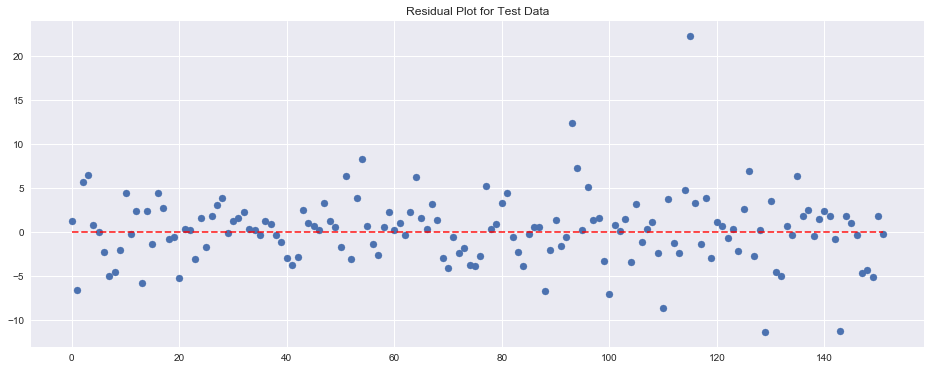

### Random Forest Regression

In [41]:
def fit_RF_Regressor(X_train,y_train,params, X_test= None,y_test= None):
    
    """Fits a Random Forest regressor with scaling"""
    
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.preprocessing import StandardScaler
    from sklearn.preprocessing import MinMaxScaler
    plt.style.use('seaborn')
    
    if type(y_train) != np.ndarray:
        y_train = y_train.values
        if all(y_test):
            y_test = y_test.values
    
    #Scalars defined
    sc_X = StandardScaler()
    sc_y = StandardScaler()
    
#     sc_X = MinMaxScaler()
#     sc_y = MinMaxScaler()
    
    
    
    #Scalers fitted to training data
    X_train_scaled = sc_X.fit_transform(X_train)
    y_train_scaled = sc_y.fit_transform(y_train.reshape(-1,1))
#     y_train_scaled = y_train_scaled.ravel()
    
    if any(X_test):
        X_test_scaled = sc_X.transform(X_test)
        y_test_scaled = sc_y.fit(y_test.reshape(-1,1))
#         y_test_scaled = y_test_scaled.ravel()
        
    #Scaled data fitted to regressor

    regressor = RandomForestRegressor(**params)
    regressor.fit(X_train_scaled, y_train_scaled)
    
    #Training data
    y_train_pred_scaled = regressor.predict(X_train_scaled)
    y_train_pred = sc_y.inverse_transform(y_train_pred_scaled.reshape(-1,1))
    mse_train = np.sqrt(((y_train - y_train_pred.ravel())**2).sum()/len(y_train))
    print(f"Mean Square Error Train: {round(mse_train,2)}")
    
    fig,axes = plt.subplots(nrows=1, ncols=2,figsize =( 16,8))
    axes[0].scatter(y_train, y_train_pred)
    axes[0].set_title('Train: Actual vs Predicted')
    axes[0].set_xlabel('Actual')
    axes[0].set_ylabel('Predicted')
    axes[0].plot([y_train.min(),y_train.max()],[y_train.min(),y_train.max()], linestyle = "--", color = 'r' )
    
    
    
    if any(X_test):
        y_test_pred_scaled = regressor.predict(X_test_scaled)
        y_test_pred = sc_y.inverse_transform(y_test_pred_scaled.reshape(-1,1))
        mse_test = np.sqrt(((y_test - y_test_pred.ravel())**2).sum()/len(y_test))
        print(f"Test Square Error Test:  {round(mse_test,2)}")
        
        axes[1].scatter(y_test, y_test_pred)
        axes[1].set_title('Train: Actual vs Predicted')
        axes[1].set_xlabel('Actual')
        axes[1].set_ylabel('Predicted')
        axes[1].plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()], linestyle = "--", color = 'r' )
        
        #Residuals
        res = y_test - y_test_pred.ravel()
        plt.figure(figsize = (16,6))
        plt.scatter(range(len(y_test)),res)
        plt.plot(range(len(y_test)),np.zeros(len(y_test)),color = 'r',alpha = 0.8,linestyle = '--')
        plt.title('Residual Plot for Test Data')
        
        #Coefficients
        fig, axes = plt.subplots(figsize = (16,6))
        axes.bar(X.columns, regressor.feature_importances_)
        axes.plot(X.columns, np.zeros(len(X.columns)) ,color = 'r',alpha = 0.8,linestyle = '--')
        axes.set_title("Feature importance")
        
        
    return regressor, y_train_pred, y_test_pred


    

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Square Error Train: 1.28
Test Square Error Test:  3.01


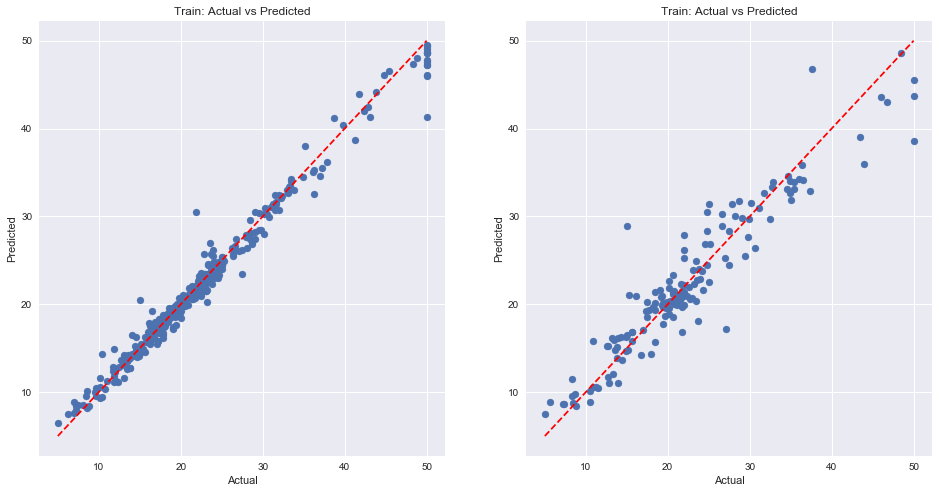

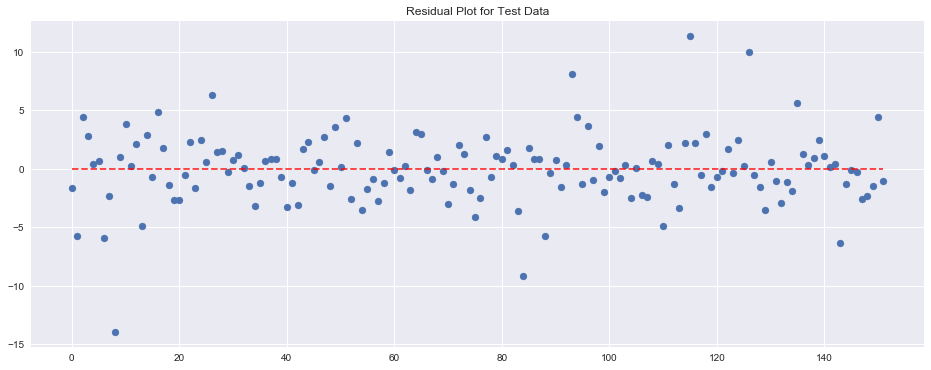

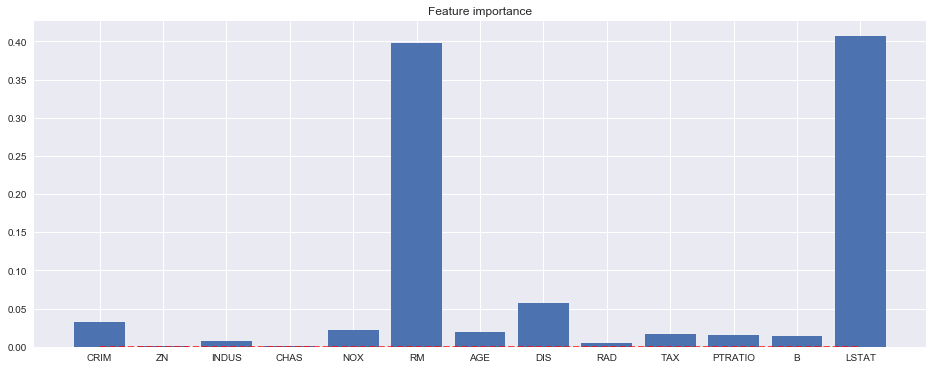

In [43]:
params = {'n_estimators' : 1000, 'random_state' : 1}
model, y_train_pred, y_test_pred = fit_RF_Regressor(X_train,y_train,params, X_test,y_test);